In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\desktop\\Imarticus\\python'

In [3]:
d = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\Python\deliveries.csv")
m = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\Python\matches.csv")

In [4]:
d.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
d.shape

(150460, 21)

In [7]:
m['team1'].value_counts()

team1
Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: count, dtype: int64

In [8]:
def name_changer(data):
    if data=='Delhi Daredevils':
       data='Delhi Capitals'
    elif data=='Deccan Chargers':
       data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
       data='Rising Pune Supergiants'
    return data

In [9]:
#Applying changes to matches dataset
m['team2']=m['team2'].apply(lambda x:name_changer(x))
m['team1']=m['team1'].apply(lambda x:name_changer(x))

m['toss_winner']=m['toss_winner'].apply(lambda x:name_changer(x))

##Applying changes to deliveries dataset
d['batting_team']=d['batting_team'].apply(lambda x:name_changer(x))
d['bowling_team']=d['bowling_team'].apply(lambda x:name_changer(x))

In [10]:
m['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [11]:
m.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala','Delhi Daredevils','Deccan Chargers','Pune warriors'],
        ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','KTK','DD','DC','PW'])

d.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala','Delhi Daredevils','Deccan Chargers','Pune warriors'],
        ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','KTK','DD','DC','PW'])

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,RCB,SRH,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,RCB,SRH,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,RCB,SRH,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,RCB,SRH,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [12]:
m.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [13]:
# m=m.drop(columns=['umpire1','umpire2','umpire3'],axis=1)  #axis =1 means dropping the whole column

# m['city'].fillna("Not known",inplace = True)
# m['winner'].fillna("Not known",inplace = True)
# m['player_of_match'].fillna("Not known",inplace = True)

In [14]:
m.sample(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
585,586,2016,Chandigarh,2016-04-17,Rising Pune Supergiants,Kings XI Punjab,Rising Pune Supergiants,bat,normal,0,Kings XI Punjab,0,6,M Vohra,"Punjab Cricket Association IS Bindra Stadium, ...",S Ravi,C Shamshuddin,NaN
158,159,2009,Durban,2009-05-14,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Royal Challengers Bangalore,0,2,LRPL Taylor,Kingsmead,BR Doctrove,DJ Harper,NaN


In [15]:
m.winner.value_counts()

winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64

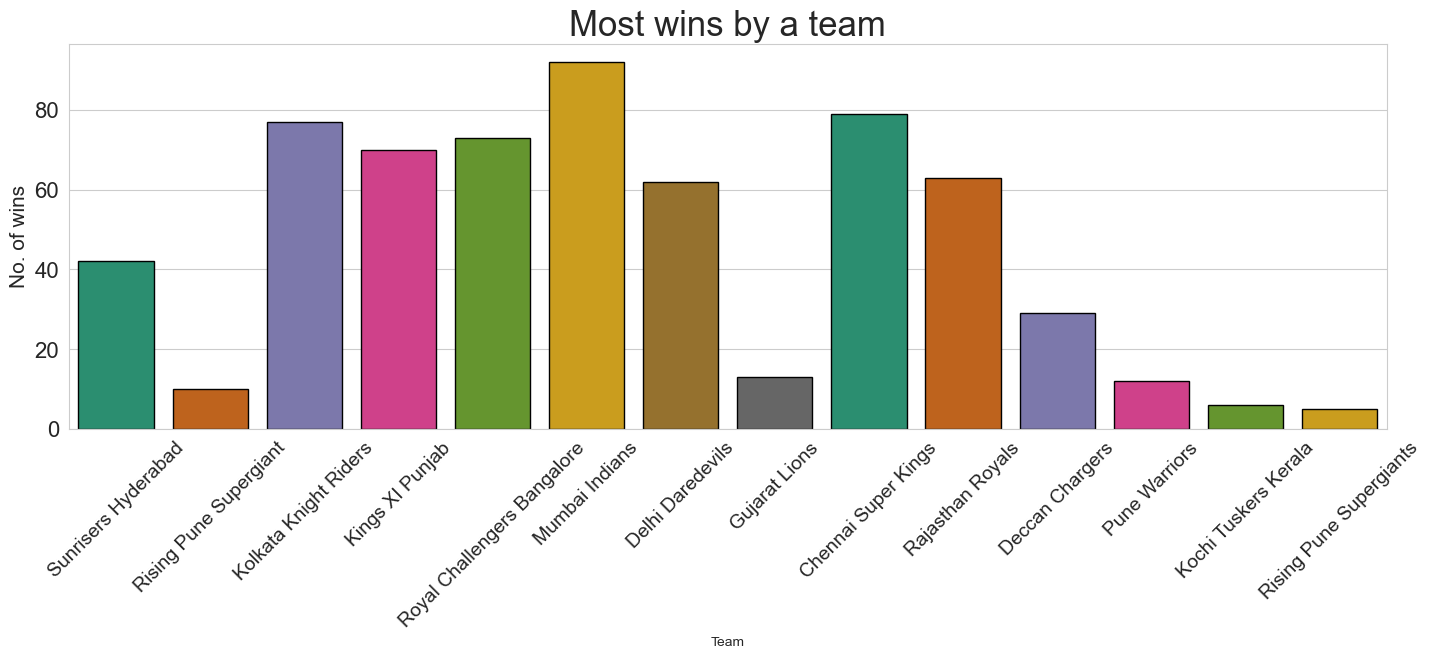

In [16]:
plt.figure(figsize=(17,5)) 
sns.set_style('whitegrid')
sns.countplot(x = m['winner'],palette='Dark2',edgecolor='black')

plt.title("Most wins by a team",size=25)
plt.xlabel("Team",size=10)
plt.ylabel("No. of wins",size=15)
plt.yticks(size=16)
plt.xticks(size=14,rotation=45)
plt.show()

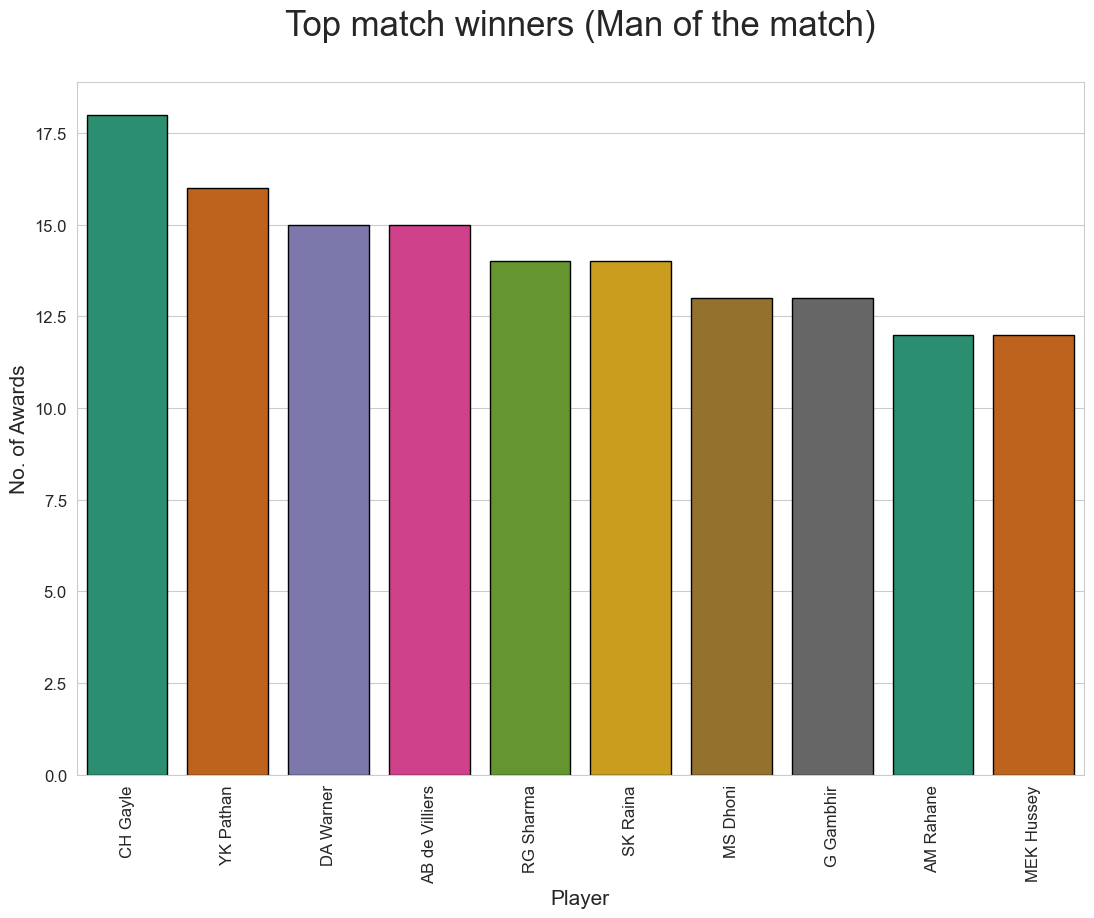

In [17]:
most_mom =m['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player' ,'No. of Awards']

plt.figure(figsize=(13,9))
sns.barplot(x = most_mom['Player'], y=most_mom['No. of Awards'],palette = 'Dark2',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title("Top match winners (Man of the match)\n",size=25)
plt.xlabel("Player",size=15)
plt.ylabel("No. of Awards",size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [18]:
best_batsman = d.groupby(['batsman']).batsman_runs.sum().reset_index()
# best_batsman = best_batsman.set_index('batsman').sort_values(by = ['batsman_runs',ascending = False])
best_batsman

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


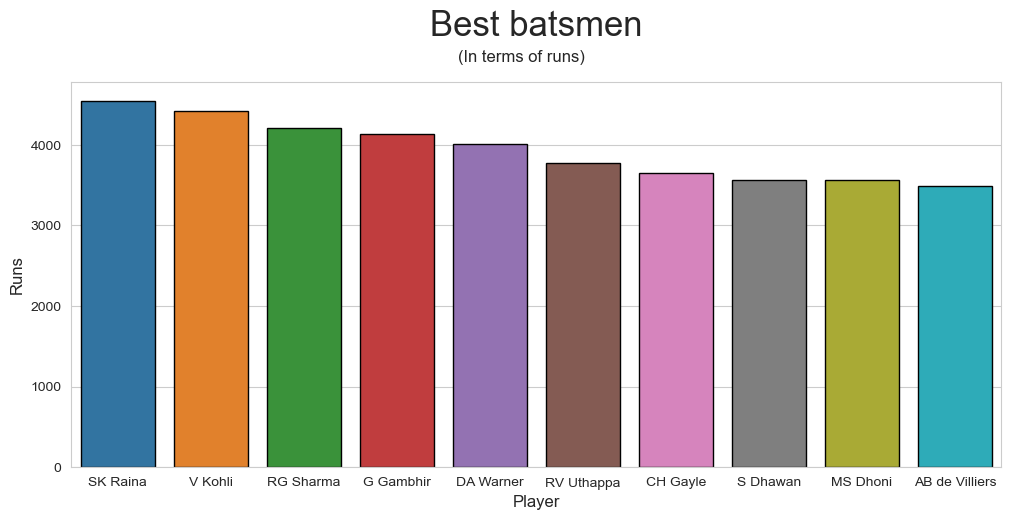

In [19]:
best_batsman = d.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman = best_batsman.set_index('batsman').sort_values(by = ['batsman_runs'],ascending = False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x = best_batsman.index, y= best_batsman['batsman_runs'],edgecolor='black')

plt.title("Best batsmen\n",size=25)
plt.suptitle('\n(In terms of runs)')
plt.xlabel("Player",size=12)
plt.ylabel("Runs",size=12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

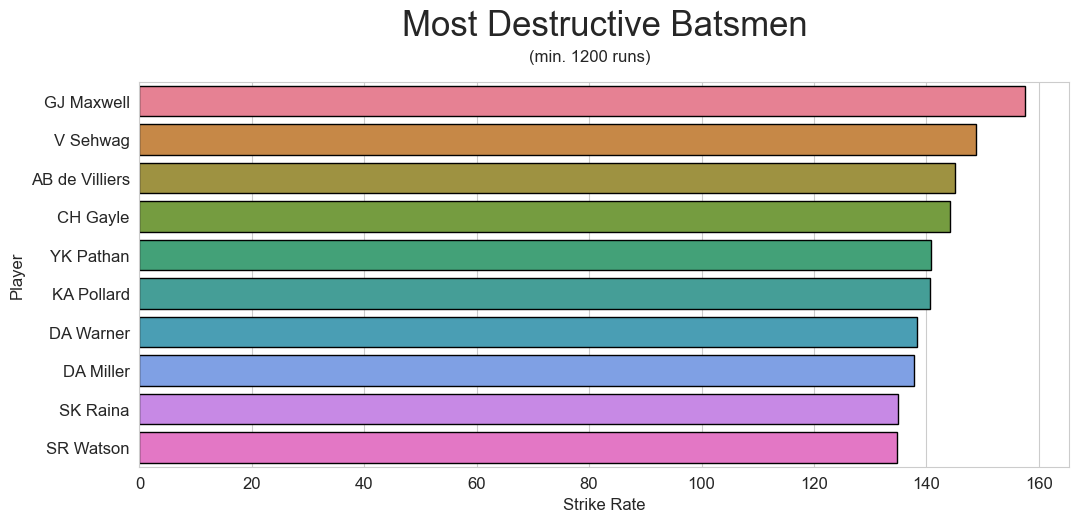

In [20]:
strike_rate = d.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls']= d.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate']= strike_rate['batsman_runs']/strike_rate['balls']*100
strike_rate = strike_rate[strike_rate['batsman_runs']>=1200].sort_values(by=['rate'],ascending = False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x =strike_rate['rate'],y = strike_rate['batsman'],palette='husl',edgecolor='black')

plt.title("Most Destructive Batsmen\n",size=25)
plt.suptitle('\n(min. 1200 runs)')
plt.xlabel("Strike Rate",size=12)
plt.ylabel("Player",size=12)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [21]:
d['bowler'].value_counts()

bowler
Harbhajan Singh    2989
A Mishra           2703
SL Malinga         2694
P Kumar            2637
PP Chawla          2594
                   ... 
F du Plessis          6
V Shankar             6
SA Yadav              6
SPD Smith             2
AC Gilchrist          1
Name: count, Length: 356, dtype: int64

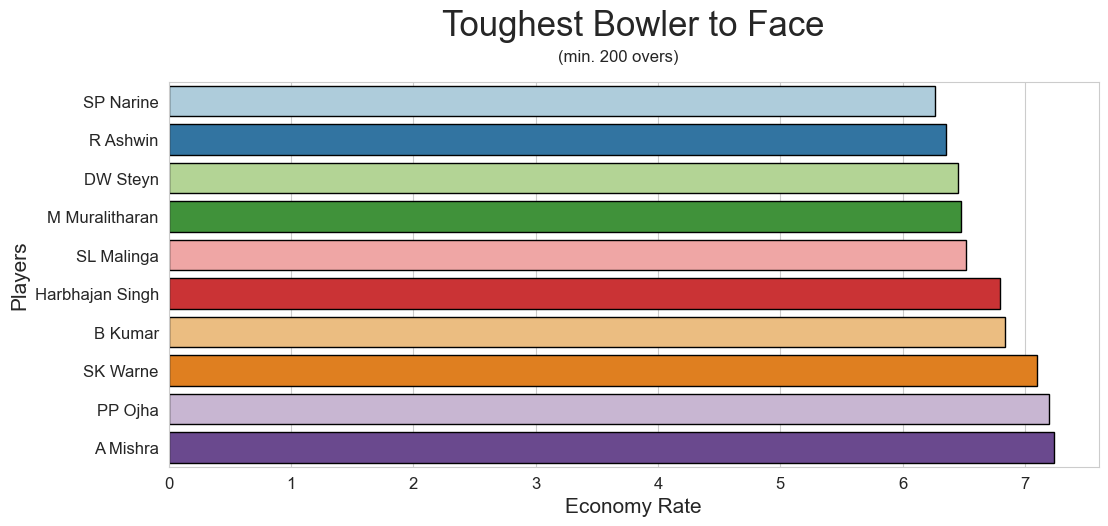

In [22]:
economy_rate = d.groupby(['bowler']).sum()
economy_rate['over']=d['bowler'].value_counts()/6
economy_rate['runs']=economy_rate['wide_runs']+economy_rate['noball_runs']+economy_rate['batsman_runs']
economy_rate= economy_rate[economy_rate['over'] >= 200]
economy_rate['rate'] = economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=economy_rate['rate'], y=economy_rate.index, palette='Paired',
              edgecolor='black')
plt.title('Toughest Bowler to Face\n', size=25)
plt.suptitle('\n(min. 200 overs)')
plt.ylabel('Players', size=15)
plt.xlabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [23]:
d['dismissal_kind'].value_counts()

dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64

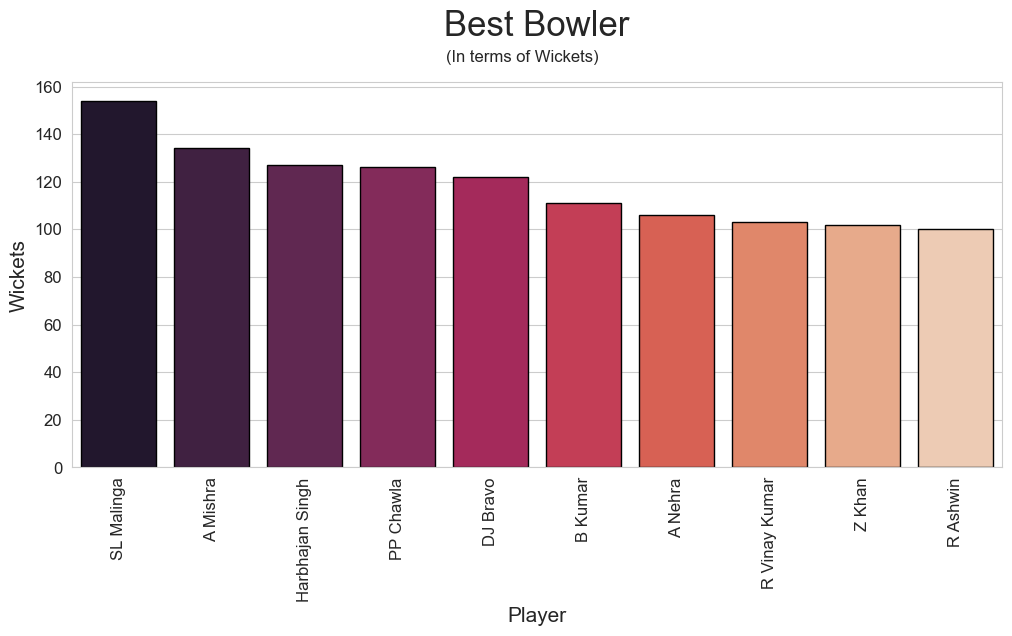

In [24]:
dismissal = ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']

best_bowler = d.loc[d['dismissal_kind'].isin(dismissal)]

best_bowler = best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns = ['bowler', 'wickets']

plt.figure(figsize=(12,5))
sns.barplot(x=best_bowler['bowler'], y=best_bowler['wickets'],palette='rocket', 
         edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Bowler\n', size=25)
plt.suptitle('\n(In terms of Wickets)')
plt.ylabel('Wickets', size=15)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()